# Analyzing a real world data-set with SQL and Python

Estimated time needed: **15** minutes

## Objectives


*   Understand a dataset of selected socioeconomic indicators in Chicago
*   Read Dataset using Python and store data in an SQLite database.
*   Solve example problems to practice SQL skills


## Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators


### Connect to the database

Let us first load the SQL extension and establish a connection with the database

##### The syntax for connecting to magic sql using sqllite is

  **%sql sqlite://DatabaseName**   
  
where DatabaseName will be your **.db** file 


In [39]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [40]:
import sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install -q pandas==1.1.5

In [41]:
%sql sqlite:///socioeconomic.db

'Connected: @socioeconomic.db'

### Store the dataset in a Table

##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the csv files  from the given url  into pandas dataframes

##### Next we will be using the  df.to_sql() function to convert each csv file  to a table in sqlite  with the csv data loaded in it.



In [42]:
import pandas
df = pandas.read_csv('Chicago_dataset.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


##### You can verify that the table creation was successful by making a basic query like:


In [43]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

### Problem 1

##### How many rows are in the dataset?


In [44]:
%sql SELECT COUNT(*) AS TOTAL_ROWS FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


TOTAL_ROWS
78


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?


In [45]:
%%sql

SELECT COUNT(community_area_name) AS COMMUNITY_AREAS_WITH_BETTER_HARDSHIP_INDEX
FROM chicago_socioeconomic_data
WHERE hardship_index > 50.0;

 * sqlite:///socioeconomic.db
Done.


COMMUNITY_AREAS_WITH_BETTER_HARDSHIP_INDEX
38


### Problem 3

##### What is the maximum value of hardship index in this dataset?


In [46]:
%%sql

SELECT MAX(hardship_index) AS MAX_HARDSHIP_INDEX
FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX_HARDSHIP_INDEX
98.0


### Problem 4

##### Which community area which has the highest hardship index?


In [48]:
%%sql

SELECT community_area_name AS COMMUNITY_WITH_HIGHEST_INDEX
FROM chicago_socioeconomic_data
WHERE hardship_index = (
    SELECT MAX(hardship_index)
    FROM chicago_socioeconomic_data
);

 * sqlite:///socioeconomic.db
Done.


COMMUNITY_WITH_HIGHEST_INDEX
Riverdale


In [49]:
%%sql
-- Another Technique to Retrieve the information

SELECT community_area_name AS COMMUNITY_WITH_HIGHEST_INDEX
FROM chicago_socioeconomic_data
ORDER BY hardship_index DESC
LIMIT 1;

 * sqlite:///socioeconomic.db
Done.


COMMUNITY_WITH_HIGHEST_INDEX
Riverdale


### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [50]:
%%sql

SELECT community_area_name AS COMMUNITY_WITH_PCI_GT_$60000
FROM chicago_socioeconomic_data
WHERE per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


COMMUNITY_WITH_PCI_GT_$60000
Lake View
Lincoln Park
Near North Side
Loop


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


 * sqlite:///socioeconomic.db
Done.


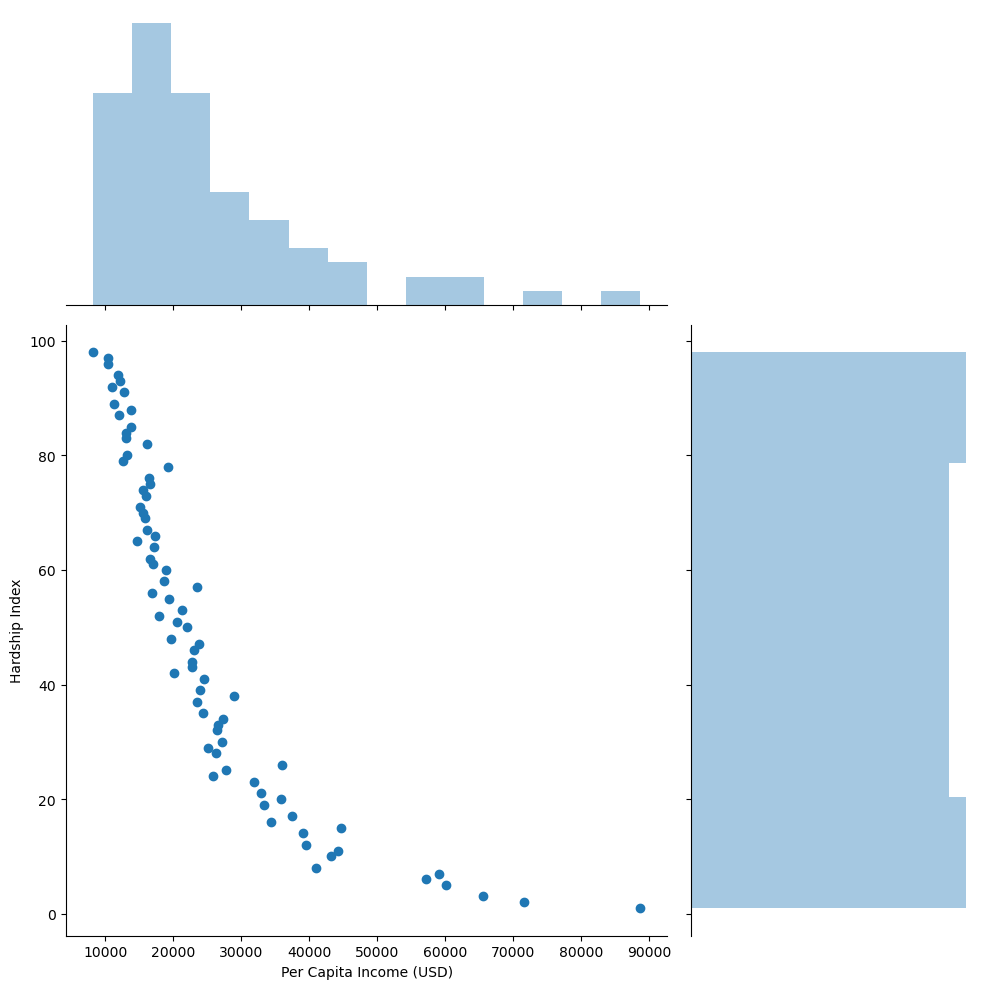

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

perCapitaIncome_vs_hardshipIndex = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
dfCopy = perCapitaIncome_vs_hardshipIndex.DataFrame()

plot = sns.jointplot(x ='per_capita_income_', y='hardship_index', data = dfCopy, height=10, ratio=2)

# Rename the axis labels
plot.set_axis_labels('Per Capita Income (USD)', 'Hardship Index')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

With the increase in Per Capita Income, the Hardship index is decreasing. Also, we can notice that the points in scatter plot are somehow close to a straight line. Hence, two variables are strongly negative correlated.

---

This project was conducted as a part of my certification program at Coursera on "IBM Professional Data Analyst" .